In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

This notebook looks at 3 years of population data of North Carolina: 23,24,25, for people aged 65-84. I broke it down first into three data frames, one for each year.  Then for each year, I found the total population for each county (this takes into account the different age groups, sex, and race).
Next I calculated the % growth for each year of this age group

I then went to look at what percent this age group makes up out of the whole population for each county, year.





### 2023:

In [2]:
demographics= pd.read_csv('../data/NC_65_84_poplation_2023_csv.csv')
demographics

,County,Year,Hispanic/Race,Sex,Age Group,Value,Estimate/Projection,vintage,fips
0,Anson,2023,NHWhite,Female,Population Age 80-84,224,Estimate,2023,37007
1,Alleghany,2023,NHWhite,Male,Population Age 75-79,283,Estimate,2023,37005
2,Alleghany,2023,NHWhite,Female,Population Age 70-74,438,Estimate,2023,37005
3,Anson,2023,NHWhite,Male,Population Age 75-79,271,Estimate,2023,37007
4,Anson,2023,Hispanic,Male,Population Age 75-79,2,Estimate,2023,37007
...,...,...,...,...,...,...,...,...,...
2395,Yadkin,2023,NHOther,Female,Population Age 65-69,120,Estimate,2023,37197
2396,Yancey,2023,Hispanic,Male,Population Age 70-74,8,Estimate,2023,37199
2397,Jackson,2023,NHOther,Male,Population Age 65-69,105,Estimate,2023,37099
2398,Jackson,2023,NHOther,Male,Population Age 75-79,73,Estimate,2023,37099


In [3]:
NC_Population_23=demographics[['County','Value', 'Estimate/Projection']]
NC_Population_23

,County,Value,Estimate/Projection
0,Anson,224,Estimate
1,Alleghany,283,Estimate
2,Alleghany,438,Estimate
3,Anson,271,Estimate
4,Anson,2,Estimate
...,...,...,...
2395,Yadkin,120,Estimate
2396,Yancey,8,Estimate
2397,Jackson,105,Estimate
2398,Jackson,73,Estimate


In [4]:
NC_Population_23['total_pop_2023_IRF_Age']=NC_Population_23.groupby('County')['Value'].transform(sum)
NC_Population_23

C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\1733700976.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  NC_Population_23['total_pop_2023_IRF_Age']=NC_Population_23.groupby('County')['Value'].transform(sum)
C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\1733700976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_Population_23['total_pop_2023_IRF_Age']=NC_Population_23.groupby('County')['Value'].transform(sum)


,County,Value,Estimate/Projection,total_pop_2023_IRF_Age
0,Anson,224,Estimate,3991
1,Alleghany,283,Estimate,2845
2,Alleghany,438,Estimate,2845
3,Anson,271,Estimate,3991
4,Anson,2,Estimate,3991
...,...,...,...,...
2395,Yadkin,120,Estimate,7138
2396,Yancey,8,Estimate,4446
2397,Jackson,105,Estimate,8497
2398,Jackson,73,Estimate,8497


dropping duplicates:

In [5]:
NC_Population_23=NC_Population_23.drop_duplicates('County')


NC_Population_23

In [6]:
NC_Population_23=NC_Population_23.drop(columns=['Value'])
NC_Population_23

,County,Estimate/Projection,total_pop_2023_IRF_Age
0,Anson,Estimate,3991
1,Alleghany,Estimate,2845
5,Ashe,Estimate,6806
6,Alamance,Estimate,28177
8,Martin,Estimate,5016
...,...,...,...
331,Stanly,Estimate,11431
334,Halifax,Estimate,9530
354,Warren,Estimate,4578
366,Stokes,Estimate,9458


#### Now I will filter down to the 16 counties from the IRF data set

In [7]:
IRF_provider_data_June_23 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility-Provider_Data_Jun2023.csv')


NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [8]:
NC_IRF_provider_data_June_23= IRF_provider_data_June_23.loc[IRF_provider_data_June_23['State']=='NC']
NC_IRF_provider_data_June_23.head(1)

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,Phone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
47804,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_LOWER,0.235,-,07/01/2021,06/30/2022,-


In [9]:
NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [10]:
NC_IRF_provider_data_June_23_filtered=NC_IRF_provider_data_June_23[NC_IRF_provider_data_June_23['County Name'].isin(NC_IRF_Counties_List)]

In [11]:
NC_IRF_provider_data_June_23_filtered

,CMS Certification Number (CCN),Facility Name,Address Line 1,Address Line 2,City,State,Zip Code,County Name,Phone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
47804,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_LOWER,0.235,-,07/01/2021,06/30/2022,-
47805,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_UPPER,4.631,-,07/01/2021,06/30/2022,-
47806,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_COMP_PERF,No Different than the National Benchmark,-,07/01/2021,06/30/2022,-
47807,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_DOPC_DAYS,750,-,07/01/2021,06/30/2022,-
47808,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_ELIGCASES,1.427,-,07/01/2021,06/30/2022,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49499,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_022_01_NUMERATOR,0,-,10/01/2021,09/30/2022,-
49500,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_022_01_OBS_RATE,0.0,-,10/01/2021,09/30/2022,-
49501,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_023_01_DENOMINATOR,3448,-,07/01/2022,09/30/2022,-
49502,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_023_01_NUMERATOR,3250,-,07/01/2022,09/30/2022,-


In [12]:
NC_IRF_provider_data_June_23_filtered=NC_IRF_provider_data_June_23_filtered[['Facility Name', 'City', 'County Name']]
NC_IRF_provider_data_June_23_filtered

,Facility Name,City,County Name
47804,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
47805,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
47806,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
47807,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
47808,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
...,...,...,...
49499,DURHAM REGIONAL HOSPITAL,DURHAM,Durham
49500,DURHAM REGIONAL HOSPITAL,DURHAM,Durham
49501,DURHAM REGIONAL HOSPITAL,DURHAM,Durham
49502,DURHAM REGIONAL HOSPITAL,DURHAM,Durham


In [13]:
NC_IRF_provider_data_June_23_filtered=NC_IRF_provider_data_June_23_filtered.drop_duplicates('County Name').reset_index()


In [14]:
NC_IRF_provider_data_June_23_filtered=NC_IRF_provider_data_June_23_filtered.rename(columns={'County Name':'County'})
NC_IRF_provider_data_June_23_filtered

,index,Facility Name,City,County
0,47804,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
1,47872,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg
2,47940,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth
3,48008,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford
4,48212,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan
5,48280,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir
6,48348,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland
7,48416,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt
8,48552,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange
9,48620,WAKEMED REHAB,RALEIGH,Wake


Merging provider data 2023 with population 2023

In [15]:
NC_IRF_provider_data_June_23_filtered.head(1)

,index,Facility Name,City,County
0,47804,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe


In [16]:
NC_Population_23.head(1)

,County,Estimate/Projection,total_pop_2023_IRF_Age
0,Anson,Estimate,3991


In [17]:
NC_IRFs_And_Pop_Merged_23= pd.merge(NC_IRF_provider_data_June_23_filtered, NC_Population_23,
                     on='County',
                     how='left')
NC_IRFs_And_Pop_Merged_23

,index,Facility Name,City,County,Estimate/Projection,total_pop_2023_IRF_Age
0,47804,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe,Estimate,54418
1,47872,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg,Estimate,131085
2,47940,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth,Estimate,61376
3,48008,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford,Estimate,80439
4,48212,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan,Estimate,25446
5,48280,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir,Estimate,10508
6,48348,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland,Estimate,40810
7,48416,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt,Estimate,23710
8,48552,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange,Estimate,22580
9,48620,WAKEMED REHAB,RALEIGH,Wake,Estimate,143584


#### 2024

In [18]:
demographics_24=pd.read_csv('../data/NC_65_84_poplation_2024_csv.csv')
demographics_24

,County,Year,Hispanic/Race,Sex,Age Group,Value,Estimate/Projection,vintage,fips
0,Alamance,2024,NHWhite,Male,Population Age 65-69,3277,Projection,2024,37001
1,Alamance,2024,Hispanic,Male,Population Age 70-74,166,Projection,2024,37001
2,Alexander,2024,NHOther,Female,Population Age 70-74,113,Projection,2024,37003
3,Avery,2024,NHWhite,Male,Population Age 80-84,249,Projection,2024,37011
4,Alleghany,2024,NHOther,Male,Population Age 70-74,17,Projection,2024,37005
...,...,...,...,...,...,...,...,...,...
2395,Wayne,2024,NHOther,Female,Population Age 80-84,518,Projection,2024,37191
2396,Wilkes,2024,NHOther,Female,Population Age 65-69,181,Projection,2024,37193
2397,Wilkes,2024,NHOther,Female,Population Age 75-79,104,Projection,2024,37193
2398,Jackson,2024,Hispanic,Female,Population Age 75-79,11,Projection,2024,37099


In [19]:
NC_Population_24=demographics_24[['County','Value', 'Estimate/Projection']]
NC_Population_24

,County,Value,Estimate/Projection
0,Alamance,3277,Projection
1,Alamance,166,Projection
2,Alexander,113,Projection
3,Avery,249,Projection
4,Alleghany,17,Projection
...,...,...,...
2395,Wayne,518,Projection
2396,Wilkes,181,Projection
2397,Wilkes,104,Projection
2398,Jackson,11,Projection


In [20]:
NC_Population_24['total_pop_2024_IRF_Age']=NC_Population_24.groupby('County')['Value'].transform(sum)
NC_Population_24

C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\2735107312.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  NC_Population_24['total_pop_2024_IRF_Age']=NC_Population_24.groupby('County')['Value'].transform(sum)
C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\2735107312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_Population_24['total_pop_2024_IRF_Age']=NC_Population_24.groupby('County')['Value'].transform(sum)


,County,Value,Estimate/Projection,total_pop_2024_IRF_Age
0,Alamance,3277,Projection,29040
1,Alamance,166,Projection,29040
2,Alexander,113,Projection,7017
3,Avery,249,Projection,3831
4,Alleghany,17,Projection,2898
...,...,...,...,...
2395,Wayne,518,Projection,18899
2396,Wilkes,181,Projection,13863
2397,Wilkes,104,Projection,13863
2398,Jackson,11,Projection,8693


In [21]:
NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [22]:
NC_IRF_Counties_24=NC_Population_24[NC_Population_24['County'].isin(NC_IRF_Counties_List)]
NC_IRF_Counties_24

,County,Value,Estimate/Projection,total_pop_2024_IRF_Age
13,Moore,528,Projection,23826
16,Durham,2267,Projection,47681
21,Buncombe,2828,Projection,56053
23,Lenoir,164,Projection,10666
24,Cumberland,1018,Projection,41691
...,...,...,...,...
2346,Forsyth,4218,Projection,63148
2351,Rowan,82,Projection,26215
2352,Guilford,3145,Projection,82782
2363,Cumberland,3006,Projection,41691


In [23]:
NC_IRF_Counties_24=NC_IRF_Counties_24.drop_duplicates('County').reset_index(drop=True)


In [24]:
NC_IRF_Counties_24=NC_IRF_Counties_24.drop(columns=['Value'])


In [25]:
IRF_provider_data_June_24 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility-Provider_Data_Jun2024.csv')

In [26]:
NC_IRF_provider_data_June_24= IRF_provider_data_June_24.loc[IRF_provider_data_June_24['State']=='NC']
NC_IRF_provider_data_June_24.head(1)

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
48144,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_LOWER,0.516,-,07/01/2022,06/30/2023,-


In [27]:
NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [28]:
NC_IRF_provider_data_June_24_filtered=NC_IRF_provider_data_June_24[NC_IRF_provider_data_June_24['County/Parish'].isin(NC_IRF_Counties_List)]

In [29]:
NC_IRF_provider_data_June_24_filtered

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
48144,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_LOWER,0.516,-,07/01/2022,06/30/2023,-
48145,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_UPPER,3.917,-,07/01/2022,06/30/2023,-
48146,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_COMP_PERF,No Different than the National Benchmark,-,07/01/2022,06/30/2023,-
48147,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_DOPC_DAYS,968,-,07/01/2022,06/30/2023,-
48148,343025,CAREPARTNERS REHABILITATION HOSP,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_ELIGCASES,2.463,-,07/01/2022,06/30/2023,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49907,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_022_01_NUMERATOR,2,-,10/01/2022,09/30/2023,-
49908,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_022_01_OBS_RATE,0.6,-,10/01/2022,09/30/2023,-
49909,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_023_01_DENOMINATOR,"3,113",-,07/01/2023,09/30/2023,-
49910,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_023_01_NUMERATOR,"2,926",-,07/01/2023,09/30/2023,-


In [30]:
NC_IRF_provider_data_June_24_filtered=NC_IRF_provider_data_June_24_filtered[['Provider Name', 'City/Town', 'County/Parish']]


In [31]:
NC_IRF_provider_data_June_24_filtered=NC_IRF_provider_data_June_24_filtered.drop_duplicates('County/Parish')

In [32]:
NC_IRF_provider_data_June_24_filtered=NC_IRF_provider_data_June_24_filtered.rename(columns={'County/Parish':'County'})

In [33]:
NC_IRF_provider_data_June_24_filtered

,Provider Name,City/Town,County
48144,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe
48212,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg
48280,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth
48348,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford
48552,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan
48620,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir
48688,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland
48756,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt
48960,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange
49028,WAKEMED REHAB,RALEIGH,Wake


Merging 2024 population and provider data

In [34]:
NC_IRFs_And_Pop_Merged_24= pd.merge(NC_IRF_provider_data_June_24_filtered, NC_IRF_Counties_24,
                                    on='County',
                                    how='left')

#### 2025

In [35]:
demographics_25=pd.read_csv('../data/NC_65_84_poplation_2025_csv.csv')

In [36]:
NC_Population_25=demographics_25[['County','Value', 'Estimate/Projection']]
NC_Population_25

,County,Value,Estimate/Projection
0,Anson,233,Projection
1,Beaufort,1100,Projection
2,Ashe,946,Projection
3,Alexander,41,Projection
4,Martin,4,Projection
...,...,...,...
2395,Washington,0,Projection
2396,Wayne,57,Projection
2397,Wilkes,21,Projection
2398,Wilson,1095,Projection


In [37]:
NC_Population_25['total_pop_2025_IRF_Age']=NC_Population_25.groupby('County')['Value'].transform(sum)
NC_Population_25

C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\3412969564.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  NC_Population_25['total_pop_2025_IRF_Age']=NC_Population_25.groupby('County')['Value'].transform(sum)
C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\3412969564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NC_Population_25['total_pop_2025_IRF_Age']=NC_Population_25.groupby('County')['Value'].transform(sum)


,County,Value,Estimate/Projection,total_pop_2025_IRF_Age
0,Anson,233,Projection,4056
1,Beaufort,1100,Projection,10816
2,Ashe,946,Projection,7006
3,Alexander,41,Projection,7124
4,Martin,4,Projection,5071
...,...,...,...,...
2395,Washington,0,Projection,2713
2396,Wayne,57,Projection,19264
2397,Wilkes,21,Projection,14069
2398,Wilson,1095,Projection,14338


In [38]:
NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [39]:
NC_IRF_Counties_25=NC_Population_25[NC_Population_25['County'].isin(NC_IRF_Counties_List)]
NC_IRF_Counties_25

,County,Value,Estimate/Projection,total_pop_2025_IRF_Age
5,Durham,242,Projection,49417
23,Mecklenburg,326,Projection,143302
33,Cumberland,2435,Projection,42571
37,Buncombe,287,Projection,57617
47,Buncombe,976,Projection,57617
...,...,...,...,...
2379,Durham,3589,Projection,49417
2389,Vance,509,Projection,7606
2391,Wake,2644,Projection,158078
2392,Wake,6278,Projection,158078


In [40]:
NC_IRF_Counties_25=NC_IRF_Counties_25.drop_duplicates('County').drop(columns=['Value']).reset_index(drop=True)

In [41]:
NC_IRF_Counties_25

,County,Estimate/Projection,total_pop_2025_IRF_Age
0,Durham,Projection,49417
1,Mecklenburg,Projection,143302
2,Cumberland,Projection,42571
3,Buncombe,Projection,57617
4,Craven,Projection,19900
5,Guilford,Projection,85052
6,Orange,Projection,24180
7,Nash,Projection,18474
8,Lenoir,Projection,10788
9,Moore,Projection,24519


In [42]:
IRF_provider_data_June_25 = pd.read_csv('../data/Inpatient_Rehabilitation_Facility_Provider_Data_Jun2025.csv')

In [43]:
NC_IRF_provider_data_June_25= IRF_provider_data_June_25.loc[IRF_provider_data_June_25['State']=='NC']
NC_IRF_provider_data_June_25.head(1)

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
48552,343025,CAREPARTNERS REHABILITATION HOSPITAL,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_LOWER,0.381,-,7/1/2023,6/30/2024,-


In [44]:
NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [45]:
NC_IRF_provider_data_June_25_filtered=NC_IRF_provider_data_June_25[NC_IRF_provider_data_June_25['County/Parish'].isin(NC_IRF_Counties_List)]

In [46]:
NC_IRF_provider_data_June_25_filtered

,CMS Certification Number (CCN),Provider Name,Address Line 1,Address Line 2,City/Town,State,ZIP Code,County/Parish,Telephone Number,CMS Region,Measure Code,Score,Footnote,Start Date,End Date,Measure Date Range
48552,343025,CAREPARTNERS REHABILITATION HOSPITAL,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_LOWER,0.381,-,7/1/2023,6/30/2024,-
48553,343025,CAREPARTNERS REHABILITATION HOSPITAL,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_CI_UPPER,4.078,-,7/1/2023,6/30/2024,-
48554,343025,CAREPARTNERS REHABILITATION HOSPITAL,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_COMP_PERF,No Different than the National Benchmark,-,7/1/2023,6/30/2024,-
48555,343025,CAREPARTNERS REHABILITATION HOSPITAL,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_DOPC_DAYS,895,-,7/1/2023,6/30/2024,-
48556,343025,CAREPARTNERS REHABILITATION HOSPITAL,68 SWEETEN CREEK RD,-,ASHEVILLE,NC,28813,Buncombe,(828) 274-2400,4,I_006_01_ELIGCASES,2.002,-,7/1/2023,6/30/2024,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50315,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_025_02_NUMERATOR,139,-,10/1/2023,9/30/2024,-
50316,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_025_02_OBS_RATE,100,-,10/1/2023,9/30/2024,-
50317,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_026_01_DENOMINATOR,297,-,10/1/2023,9/30/2024,-
50318,34T155,DURHAM REGIONAL HOSPITAL,3643 N ROXBORO ROAD,BOX 52,DURHAM,NC,27704,Durham,(919) 470-7226,4,I_026_01_NUMERATOR,63,-,10/1/2023,9/30/2024,-


In [47]:
NC_IRF_provider_data_June_25_filtered=NC_IRF_provider_data_June_25_filtered[['Provider Name', 'City/Town', 'County/Parish']]


In [48]:
NC_IRF_provider_data_June_25_filtered=NC_IRF_provider_data_June_25_filtered.drop_duplicates('County/Parish')

In [49]:
NC_IRF_provider_data_June_25_filtered=NC_IRF_provider_data_June_25_filtered.rename(columns={'County/Parish':'County'}).reset_index(drop=True)
NC_IRF_provider_data_June_25_filtered

,Provider Name,City/Town,County
0,CAREPARTNERS REHABILITATION HOSPITAL,ASHEVILLE,Buncombe
1,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg
2,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth
3,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford
4,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan
5,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir
6,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland
7,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt
8,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange
9,WAKEMED REHAB,RALEIGH,Wake


Merging population and IRF table 2025:

In [50]:
NC_IRFs_And_Pop_Merged_25=pd.merge(NC_IRF_provider_data_June_25_filtered, NC_IRF_Counties_25,
                     on='County',
                     how='inner')
NC_IRFs_And_Pop_Merged_25

,Provider Name,City/Town,County,Estimate/Projection,total_pop_2025_IRF_Age
0,CAREPARTNERS REHABILITATION HOSPITAL,ASHEVILLE,Buncombe,Projection,57617
1,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg,Projection,143302
2,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth,Projection,64946
3,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford,Projection,85052
4,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan,Projection,26953
5,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir,Projection,10788
6,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland,Projection,42571
7,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt,Projection,24893
8,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange,Projection,24180
9,WAKEMED REHAB,RALEIGH,Wake,Projection,158078


In [51]:
dfs=[NC_IRFs_And_Pop_Merged_23, NC_IRFs_And_Pop_Merged_24, NC_IRFs_And_Pop_Merged_25]

Full_IRF_Pop_Merge = dfs[0]

for i in range(1, len(dfs)):
    Full_IRF_Pop_Merge= pd.merge(Full_IRF_Pop_Merge, dfs[i], on = 'County', how ='inner')


Full_IRF_Pop_Merge

,index,Facility Name,City,County,Estimate/Projection_x,total_pop_2023_IRF_Age,Provider Name_x,City/Town_x,Estimate/Projection_y,total_pop_2024_IRF_Age,Provider Name_y,City/Town_y,Estimate/Projection,total_pop_2025_IRF_Age
0,47804,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe,Estimate,54418,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Projection,56053,CAREPARTNERS REHABILITATION HOSPITAL,ASHEVILLE,Projection,57617
1,47872,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg,Estimate,131085,CAROLINAS REHABILITATION,CHARLOTTE,Projection,137257,CAROLINAS REHABILITATION,CHARLOTTE,Projection,143302
2,47940,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth,Estimate,61376,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Projection,63148,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Projection,64946
3,48008,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford,Estimate,80439,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Projection,82782,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Projection,85052
4,48212,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan,Estimate,25446,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Projection,26215,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Projection,26953
5,48280,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir,Estimate,10508,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Projection,10666,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Projection,10788
6,48348,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland,Estimate,40810,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Projection,41691,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Projection,42571
7,48416,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt,Estimate,23710,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Projection,24330,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Projection,24893
8,48552,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange,Estimate,22580,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Projection,23422,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Projection,24180
9,48620,WAKEMED REHAB,RALEIGH,Wake,Estimate,143584,WAKEMED REHAB,RALEIGH,Projection,150675,WAKEMED REHAB,RALEIGH,Projection,158078


In [52]:
Full_IRF_Pop_Merge=Full_IRF_Pop_Merge[['Facility Name','City','County','Estimate/Projection','total_pop_2023_IRF_Age','total_pop_2024_IRF_Age','total_pop_2025_IRF_Age']]

In [53]:
Full_IRF_Pop_Merge

,Facility Name,City,County,Estimate/Projection,total_pop_2023_IRF_Age,total_pop_2024_IRF_Age,total_pop_2025_IRF_Age
0,CAREPARTNERS REHABILITATION HOSP,ASHEVILLE,Buncombe,Projection,54418,56053,57617
1,CAROLINAS REHABILITATION,CHARLOTTE,Mecklenburg,Projection,131085,137257,143302
2,NOVANT HEALTH REHABILITATION HOSPITAL,WINSTON-SALEM,Forsyth,Projection,61376,63148,64946
3,HIGH POINT REGIONAL HOSPITAL,HIGH POINT,Guilford,Projection,80439,82782,85052
4,ROWAN REGIONAL MEDICAL CENTER,SALISBURY,Rowan,Projection,25446,26215,26953
5,LENOIR MEMORIAL HOSPITAL REHAB UNIT,KINSTON,Lenoir,Projection,10508,10666,10788
6,CAPE FEAR VALLEY REHABILITATION CENTER,FAYETTEVILLE,Cumberland,Projection,40810,41691,42571
7,PITT COUNTY MEMORIAL HOSPITAL,GREENVILLE,Pitt,Projection,23710,24330,24893
8,UNC HOSPITALS INPATIENT REHAB,CHAPEL HILL,Orange,Projection,22580,23422,24180
9,WAKEMED REHAB,RALEIGH,Wake,Projection,143584,150675,158078


In [54]:
Full_IRF_Pop_Merge.to_csv('Full_IRF_Pop_Merge.csv',index=False)

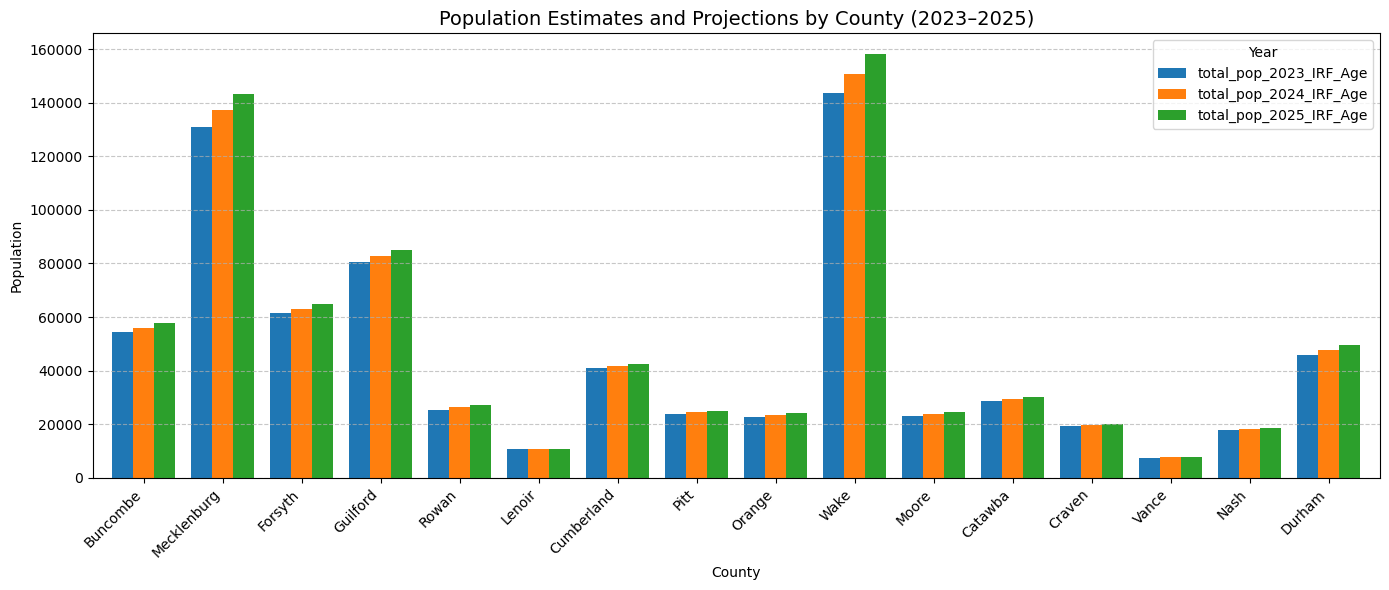

In [55]:
Full_IRF_Pop_Merge.set_index('County', inplace=True)

# Plot grouped bar chart
Full_IRF_Pop_Merge.plot(kind='bar', figsize=(14, 6), width=0.8)

plt.title('Population Estimates and Projections by County (2023–2025)', fontsize=14)
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Now lets look at what % of the total population the age group of 65-79 makes up for each county, by year

In [56]:
full_pop_23= pd.read_csv('../data/population_2023_full_csv.csv')
full_pop_23

,County,Year,Hispanic/Race,Sex,Age Group,Value,Estimate/Projection,vintage,fips
0,Alleghany,2023,NHWhite,Female,Population Age 50-54,332,Estimate,2023,37005
1,Alamance,2023,Hispanic,Female,Population Age 05-09,1206,Estimate,2023,37001
2,Alamance,2023,Hispanic,Male,Population Age 40-44,977,Estimate,2023,37001
3,Alamance,2023,NHOther,Female,Population Age 00-04,1347,Estimate,2023,37001
4,Anson,2023,NHWhite,Female,Population Age 80-84,224,Estimate,2023,37007
...,...,...,...,...,...,...,...,...,...
10795,Jackson,2023,NHOther,Male,Population Age 65-69,105,Estimate,2023,37099
10796,Jackson,2023,NHOther,Male,Population Age 75-79,73,Estimate,2023,37099
10797,Yancey,2023,NHWhite,Female,Population Age 75-79,569,Estimate,2023,37199
10798,Yancey,2023,Hispanic,Male,Population Age 55-59,19,Estimate,2023,37199


I didn't filter 2023 population (based on age group) down to the 16 counties, so I have to do that here

In [57]:
NC_IRF_Counties_List=['Buncombe','Catawba','Craven','Cumberland','Durham','Forsyth','Guilford','Lenoir','Mecklenburg','Moore','Nash','New_Hanover','Orange','Pitt','Rowan','Vance','Wake']


In [58]:
NC_Population_23=NC_Population_23[NC_Population_23['County'].isin(NC_IRF_Counties_List)].reset_index(drop=True)


In [59]:
NC_Population_23

,County,Estimate/Projection,total_pop_2023_IRF_Age
0,Durham,Estimate,45860
1,Cumberland,Estimate,40810
2,Moore,Estimate,23005
3,Buncombe,Estimate,54418
4,Guilford,Estimate,80439
5,Craven,Estimate,19471
6,Nash,Estimate,17735
7,Catawba,Estimate,28599
8,Vance,Estimate,7490
9,Lenoir,Estimate,10508


In [60]:
full_pop_23=full_pop_23.groupby('County')['Value'].sum().reset_index()
full_pop_23

,County,Value
0,Alamance,181097
1,Alexander,36231
2,Alleghany,11513
3,Anson,21619
4,Ashe,26694
...,...,...
95,Wayne,117748
96,Wilkes,65987
97,Wilson,78792
98,Yadkin,37722


In [61]:
full_pop_23=full_pop_23.rename(columns={'Value':'Total Population 2023'})
full_pop_23

,County,Total Population 2023
0,Alamance,181097
1,Alexander,36231
2,Alleghany,11513
3,Anson,21619
4,Ashe,26694
...,...,...
95,Wayne,117748
96,Wilkes,65987
97,Wilson,78792
98,Yadkin,37722


In [62]:
full_pop_23=full_pop_23[full_pop_23['County'].isin(NC_IRF_Counties_List)]
full_pop_23

,County,Total Population 2023
10,Buncombe,277047
17,Catawba,166196
24,Craven,103605
25,Cumberland,337970
31,Durham,337263
33,Forsyth,393062
40,Guilford,550202
53,Lenoir,53966
59,Mecklenburg,1162168
62,Moore,107861


In [63]:
full_pop_23=full_pop_23.reset_index(drop=True)
full_pop_23

,County,Total Population 2023
0,Buncombe,277047
1,Catawba,166196
2,Craven,103605
3,Cumberland,337970
4,Durham,337263
5,Forsyth,393062
6,Guilford,550202
7,Lenoir,53966
8,Mecklenburg,1162168
9,Moore,107861


In [64]:
Commbined_Population_23= pd.merge(NC_Population_23, full_pop_23,
                                  on= 'County',
                                  how= 'inner')
Commbined_Population_23

,County,Estimate/Projection,total_pop_2023_IRF_Age,Total Population 2023
0,Durham,Estimate,45860,337263
1,Cumberland,Estimate,40810,337970
2,Moore,Estimate,23005,107861
3,Buncombe,Estimate,54418,277047
4,Guilford,Estimate,80439,550202
5,Craven,Estimate,19471,103605
6,Nash,Estimate,17735,97802
7,Catawba,Estimate,28599,166196
8,Vance,Estimate,7490,41263
9,Lenoir,Estimate,10508,53966


In [65]:
Commbined_Population_23['Pct IRF Age 2023']= Commbined_Population_23['total_pop_2023_IRF_Age']/Commbined_Population_23['Total Population 2023'] * 100
Commbined_Population_23

,County,Estimate/Projection,total_pop_2023_IRF_Age,Total Population 2023,Pct IRF Age 2023
0,Durham,Estimate,45860,337263,13.597697
1,Cumberland,Estimate,40810,337970,12.075036
2,Moore,Estimate,23005,107861,21.328376
3,Buncombe,Estimate,54418,277047,19.642155
4,Guilford,Estimate,80439,550202,14.619903
5,Craven,Estimate,19471,103605,18.793495
6,Nash,Estimate,17735,97802,18.133576
7,Catawba,Estimate,28599,166196,17.207995
8,Vance,Estimate,7490,41263,18.151855
9,Lenoir,Estimate,10508,53966,19.471519


In [66]:
full_pop_24= pd.read_csv('../data/population_2024_full_csv.csv')


In [67]:
full_pop_24= full_pop_24.groupby('County')['Value'].sum().to_frame()

In [68]:
full_pop_24=full_pop_24.reset_index()

In [69]:
full_pop_24=full_pop_24.rename(columns={'Value':'Total Population 2024'})

In [70]:
Commbined_Population_24= pd.merge(NC_IRF_Counties_24,full_pop_24,
                         on='County',
                         how='inner')
Commbined_Population_24

,County,Estimate/Projection,total_pop_2024_IRF_Age,Total Population 2024
0,Moore,Projection,23826,110469
1,Durham,Projection,47681,340677
2,Buncombe,Projection,56053,280032
3,Lenoir,Projection,10666,53980
4,Cumberland,Projection,41691,337971
5,Craven,Projection,19710,103220
6,Mecklenburg,Projection,137257,1180037
7,Forsyth,Projection,63148,395597
8,Guilford,Projection,82782,554791
9,Nash,Projection,18114,98544


In [71]:
Commbined_Population_24['Pct IRF Age 2024']=Commbined_Population_24['total_pop_2024_IRF_Age']/ Commbined_Population_24['Total Population 2024'] *100
Commbined_Population_24

,County,Estimate/Projection,total_pop_2024_IRF_Age,Total Population 2024,Pct IRF Age 2024
0,Moore,Projection,23826,110469,21.568042
1,Durham,Projection,47681,340677,13.995955
2,Buncombe,Projection,56053,280032,20.016641
3,Lenoir,Projection,10666,53980,19.759170
4,Cumberland,Projection,41691,337971,12.335674
5,Craven,Projection,19710,103220,19.095137
6,Mecklenburg,Projection,137257,1180037,11.631584
7,Forsyth,Projection,63148,395597,15.962710
8,Guilford,Projection,82782,554791,14.921295
9,Nash,Projection,18114,98544,18.381637


In [72]:
full_pop_25= pd.read_csv('../data/population_2025_full_csv.csv')

In [73]:
NC_IRF_Counties_25

,County,Estimate/Projection,total_pop_2025_IRF_Age
0,Durham,Projection,49417
1,Mecklenburg,Projection,143302
2,Cumberland,Projection,42571
3,Buncombe,Projection,57617
4,Craven,Projection,19900
5,Guilford,Projection,85052
6,Orange,Projection,24180
7,Nash,Projection,18474
8,Lenoir,Projection,10788
9,Moore,Projection,24519


In [74]:
full_pop_25= full_pop_25.groupby('County')['Value'].sum().to_frame()

In [75]:
full_pop_25=full_pop_25.reset_index()

In [76]:
full_pop_25=full_pop_25.rename(columns={'Value':'Total Population 2025'})

In [77]:
Commbined_Population_25= pd.merge(NC_IRF_Counties_25,full_pop_25,
                          on= 'County',
                          how='inner')
Commbined_Population_25

,County,Estimate/Projection,total_pop_2025_IRF_Age,Total Population 2025
0,Durham,Projection,49417,344427
1,Mecklenburg,Projection,143302,1198460
2,Cumberland,Projection,42571,337972
3,Buncombe,Projection,57617,283020
4,Craven,Projection,19900,103335
5,Guilford,Projection,85052,560760
6,Orange,Projection,24180,153852
7,Nash,Projection,18474,99191
8,Lenoir,Projection,10788,53992
9,Moore,Projection,24519,112620


In [78]:
Commbined_Population_25['Pct IRF Age 2025']= Commbined_Population_25['total_pop_2025_IRF_Age']/Commbined_Population_25['Total Population 2025']*100
Commbined_Population_25

,County,Estimate/Projection,total_pop_2025_IRF_Age,Total Population 2025,Pct IRF Age 2025
0,Durham,Projection,49417,344427,14.347598
1,Mecklenburg,Projection,143302,1198460,11.957178
2,Cumberland,Projection,42571,337972,12.596014
3,Buncombe,Projection,57617,283020,20.357925
4,Craven,Projection,19900,103335,19.257754
5,Guilford,Projection,85052,560760,15.167273
6,Orange,Projection,24180,153852,15.716403
7,Nash,Projection,18474,99191,18.624674
8,Lenoir,Projection,10788,53992,19.980738
9,Moore,Projection,24519,112620,21.771444


putting all the percent columns together:

In [79]:
dfs=[Commbined_Population_23, Commbined_Population_24, Commbined_Population_25]

Percent_IRF_Age_Merged = dfs[0]

for i in range(1, len(dfs)):
    Percent_IRF_Age_Merged= pd.merge(Percent_IRF_Age_Merged, dfs[i], on = 'County', how ='inner')


Percent_IRF_Age_Merged

,County,Estimate/Projection_x,total_pop_2023_IRF_Age,Total Population 2023,Pct IRF Age 2023,Estimate/Projection_y,total_pop_2024_IRF_Age,Total Population 2024,Pct IRF Age 2024,Estimate/Projection,total_pop_2025_IRF_Age,Total Population 2025,Pct IRF Age 2025
0,Durham,Estimate,45860,337263,13.597697,Projection,47681,340677,13.995955,Projection,49417,344427,14.347598
1,Cumberland,Estimate,40810,337970,12.075036,Projection,41691,337971,12.335674,Projection,42571,337972,12.596014
2,Moore,Estimate,23005,107861,21.328376,Projection,23826,110469,21.568042,Projection,24519,112620,21.771444
3,Buncombe,Estimate,54418,277047,19.642155,Projection,56053,280032,20.016641,Projection,57617,283020,20.357925
4,Guilford,Estimate,80439,550202,14.619903,Projection,82782,554791,14.921295,Projection,85052,560760,15.167273
5,Craven,Estimate,19471,103605,18.793495,Projection,19710,103220,19.095137,Projection,19900,103335,19.257754
6,Nash,Estimate,17735,97802,18.133576,Projection,18114,98544,18.381637,Projection,18474,99191,18.624674
7,Catawba,Estimate,28599,166196,17.207995,Projection,29349,168055,17.463926,Projection,30107,169918,17.718547
8,Vance,Estimate,7490,41263,18.151855,Projection,7575,41240,18.368089,Projection,7606,41231,18.447285
9,Lenoir,Estimate,10508,53966,19.471519,Projection,10666,53980,19.759170,Projection,10788,53992,19.980738


In [80]:
Percent_IRF_Age_Merged=Percent_IRF_Age_Merged[['County','Pct IRF Age 2023','Pct IRF Age 2024', 'Pct IRF Age 2025']]
Percent_IRF_Age_Merged

,County,Pct IRF Age 2023,Pct IRF Age 2024,Pct IRF Age 2025
0,Durham,13.597697,13.995955,14.347598
1,Cumberland,12.075036,12.335674,12.596014
2,Moore,21.328376,21.568042,21.771444
3,Buncombe,19.642155,20.016641,20.357925
4,Guilford,14.619903,14.921295,15.167273
5,Craven,18.793495,19.095137,19.257754
6,Nash,18.133576,18.381637,18.624674
7,Catawba,17.207995,17.463926,17.718547
8,Vance,18.151855,18.368089,18.447285
9,Lenoir,19.471519,19.759170,19.980738


In [81]:
Percent_IRF_Age_Merged.to_csv('Percent_IRF_Age_Merged.csv',index=False)

In [82]:
Percent_IRF_Age_Merged['Pct Growth']= (Percent_IRF_Age_Merged['Pct IRF Age 2025']-Percent_IRF_Age_Merged['Pct IRF Age 2023'])/(Percent_IRF_Age_Merged['Pct IRF Age 2023']) * 100
Percent_IRF_Age_Merged

C:\Users\vgcar\AppData\Local\Temp\ipykernel_32524\459819184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Percent_IRF_Age_Merged['Pct Growth']= (Percent_IRF_Age_Merged['Pct IRF Age 2025']-Percent_IRF_Age_Merged['Pct IRF Age 2023'])/(Percent_IRF_Age_Merged['Pct IRF Age 2023']) * 100


,County,Pct IRF Age 2023,Pct IRF Age 2024,Pct IRF Age 2025,Pct Growth
0,Durham,13.597697,13.995955,14.347598,5.514911
1,Cumberland,12.075036,12.335674,12.596014,4.314502
2,Moore,21.328376,21.568042,21.771444,2.077361
3,Buncombe,19.642155,20.016641,20.357925,3.644054
4,Guilford,14.619903,14.921295,15.167273,3.744004
5,Craven,18.793495,19.095137,19.257754,2.470320
6,Nash,18.133576,18.381637,18.624674,2.708223
7,Catawba,17.207995,17.463926,17.718547,2.966942
8,Vance,18.151855,18.368089,18.447285,1.627545
9,Lenoir,19.471519,19.759170,19.980738,2.615198


In [83]:
Percent_IRF_Age_Merged_sorted=Percent_IRF_Age_Merged.sort_values(by='Pct Growth', ascending = False)


In [84]:
Percent_IRF_Age_Merged_sorted=Percent_IRF_Age_Merged_sorted.reset_index(drop=True)
Percent_IRF_Age_Merged_sorted

,County,Pct IRF Age 2023,Pct IRF Age 2024,Pct IRF Age 2025,Pct Growth
0,Wake,12.016403,12.387888,12.759761,6.186194
1,Mecklenburg,11.279350,11.631584,11.957178,6.009460
2,Durham,13.597697,13.995955,14.347598,5.514911
3,Orange,14.962263,15.370481,15.716403,5.040279
4,Rowan,16.691374,17.058728,17.465429,4.637456
5,Forsyth,15.614839,15.962710,16.300316,4.389903
6,Cumberland,12.075036,12.335674,12.596014,4.314502
7,Pitt,13.560815,13.880252,14.136120,4.242406
8,Guilford,14.619903,14.921295,15.167273,3.744004
9,Buncombe,19.642155,20.016641,20.357925,3.644054


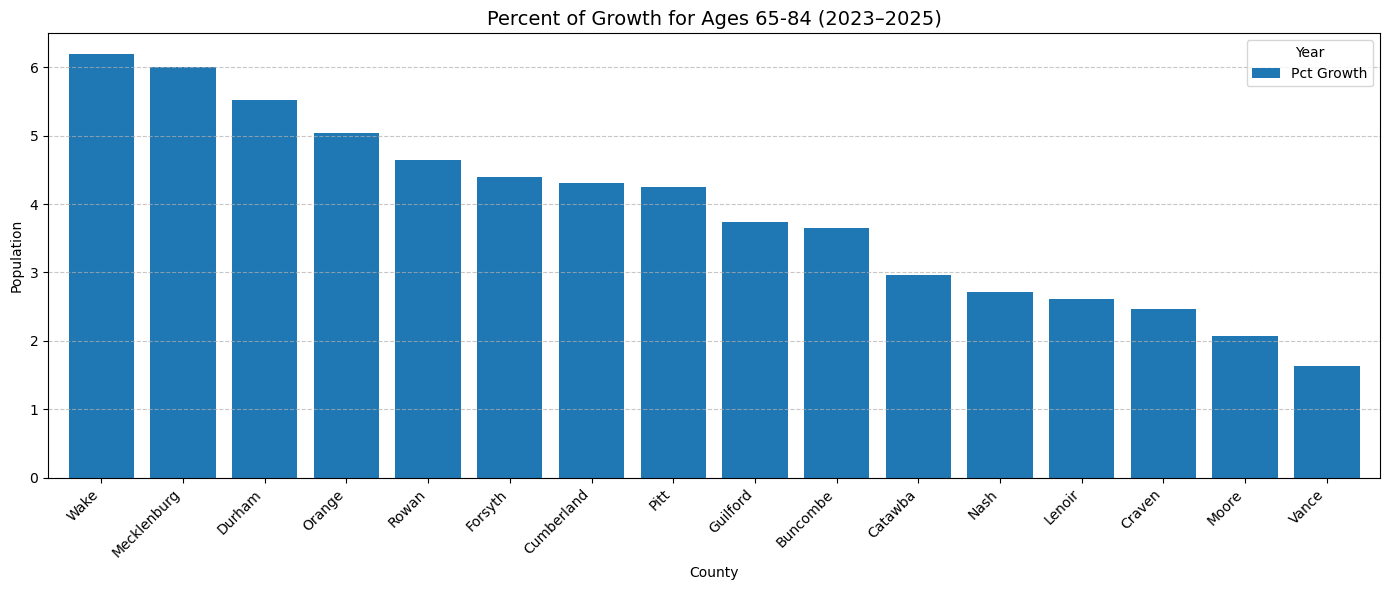

In [85]:
Percent_IRF_Age_Merged_sorted.set_index('County', inplace=True)

# Plot grouped bar chart
Percent_IRF_Age_Merged_sorted['Pct Growth'].plot(kind='bar', figsize=(14, 6), width=0.8)

plt.title('Percent of Growth for Ages 65-84 (2023–2025)', fontsize=14)
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

pct population 65+ each year:

In [98]:
population_23_25_df= pd.read_csv('../data/population_projections_by_race_age_groups_IRF_counties_23_25.csv')
population_23_25_df.head()

,fips,County,Region,COG,MSA,Year,Race,Group N,Age 0 to 2,Age 3 to 4,...,medage,Age 0 to 17,Age 18 to 24,Age 25 to 44,Age 45 to 64,Age 65 Plus,geom,Estimate/Projection,Vintage,geo_point_2d
0,37035,Catawba,Western North Carolina,Western Piedmont Council of Governments,Hickory-Lenoir-Morganton,2023,Other,1,531,362,...,22.317797,3308,884,1166,1376,1091,"{""coordinates"":[[[[-81.535403,35.568136999],[-...",Estimate,2023,"35.66204217649048, -81.21507090050821"
1,37013,Beaufort,Eastern North Carolina,Mid-East Commission,Non-Metropolitan,2023,Other,2,114,73,...,25.750000,635,132,317,237,240,"{""coordinates"":[[[[-77.174,35.732830999],[-77....",Estimate,2023,"35.48698341984559, -76.84531429244643"
2,37051,Cumberland,Eastern North Carolina,Mid-Carolina Council of Governments,Fayetteville,2025,White,1,7186,4579,...,34.145808,37437,20524,45974,31806,25406,"{""coordinates"":[[[[-78.617114,35.245717999],[-...",Projection,2024,"35.048730278966026, -78.82767910401198"
3,37049,Craven,Eastern North Carolina,Eastern Carolina Council of Governments,Non-Metropolitan,2023,Asian & Pacific Islander,1,137,99,...,38.464789,795,283,1191,854,679,"{""coordinates"":[[[[-77.473692,35.228984999],[-...",Estimate,2023,"35.11768626049315, -77.08200556349992"
4,37067,Forsyth,Central North Carolina,Piedmont Triad Council of Governments,Winston-Salem,2024,White,1,7734,4831,...,42.034691,50136,25577,63813,67530,53654,"{""coordinates"":[[[[-80.452656,36.241650999],[-...",Projection,2024,"36.13062541993835, -80.25630963982927"


In [99]:
population_23_25_df.columns

Index(['fips', 'County', 'Region', 'COG', 'MSA', 'Year', 'Race', 'Group N',
       'Age 0 to 2', 'Age 3 to 4', 'Age 5', 'Age 6 to 9', 'Age 10 to 13',
       'Age 14', 'Age 15', 'Age 16 to 17', 'Age 18 to 19', 'Age 20 to 24',
       'Age 25 to 34', 'Age 35 to 44', 'Age 45 to 54', 'Age 55 to 59',
       'Age 60 to 64', 'Age 65 to 74', 'Age 75 to 84', 'Age 85 to 99',
       'Age 100', 'Total', 'medage', 'Age 0 to 17', 'Age 18 to 24',
       'Age 25 to 44', 'Age 45 to 64', 'Age 65 Plus', 'geom',
       'Estimate/Projection', 'Vintage', 'geo_point_2d'],
      dtype='object')

In [100]:
population_23_25_df=population_23_25_df[['County','Race','Region','Age 65 Plus','Total','Year']]
population_23_25_df

,County,Race,Region,Age 65 Plus,Total,Year
0,Catawba,Other,Western North Carolina,1091,7825,2023
1,Beaufort,Other,Eastern North Carolina,240,1561,2023
2,Cumberland,White,Eastern North Carolina,25406,161147,2025
3,Craven,Asian & Pacific Islander,Eastern North Carolina,679,3802,2023
4,Forsyth,White,Central North Carolina,53654,260710,2024
...,...,...,...,...,...,...
247,Wake,Asian & Pacific Islander,Central North Carolina,11414,121008,2024
248,Wake,Black,Central North Carolina,25607,219853,2024
249,Pitt,Black,Eastern North Carolina,8576,65899,2025
250,Wake,Asian & Pacific Islander,Central North Carolina,12371,126357,2025


In [101]:
population_23_25_df['pct 65 plus']= (population_23_25_df['Age 65 Plus']/population_23_25_df['Total']) * 100
population_23_25_df

,County,Race,Region,Age 65 Plus,Total,Year,pct 65 plus
0,Catawba,Other,Western North Carolina,1091,7825,2023,13.942492
1,Beaufort,Other,Eastern North Carolina,240,1561,2023,15.374760
2,Cumberland,White,Eastern North Carolina,25406,161147,2025,15.765729
3,Craven,Asian & Pacific Islander,Eastern North Carolina,679,3802,2023,17.859022
4,Forsyth,White,Central North Carolina,53654,260710,2024,20.579955
...,...,...,...,...,...,...,...
247,Wake,Asian & Pacific Islander,Central North Carolina,11414,121008,2024,9.432434
248,Wake,Black,Central North Carolina,25607,219853,2024,11.647328
249,Pitt,Black,Eastern North Carolina,8576,65899,2025,13.013855
250,Wake,Asian & Pacific Islander,Central North Carolina,12371,126357,2025,9.790514


In [105]:
new_df= population_23_25_df.groupby('Year').agg({'Age 65 Plus': 'sum',
                                                 'Total':'sum'})
new_df

,Age 65 Plus,Total
Year,,
2023,812550,5307980
2024,841746,5368963
2025,870778,5433465


In [107]:
new_df['Pct 65 plus']=(new_df['Age 65 Plus']/new_df['Total']) *100
new_df

,Age 65 Plus,Total,Pct 65 plus
Year,,,
2023,812550,5307980,15.308083
2024,841746,5368963,15.678000
2025,870778,5433465,16.026201
